1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


Normalization factor: 1.0000449202687012


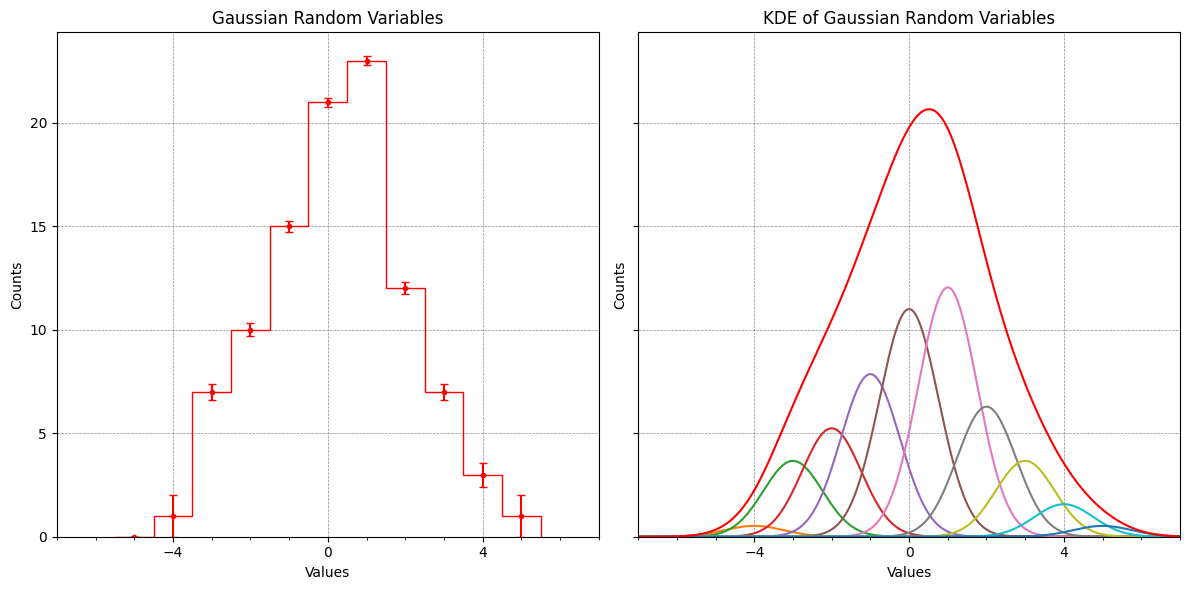

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
from scipy.integrate import trapezoid

mean = 0
sigma = 2
x = np.random.normal(mean, sigma, size=100)

fig, ax = plt.subplots(1,2,figsize=(12,6), sharex=True, sharey=True)

# 1st plot

edge = np.max([abs(np.floor(np.min(x))), abs(np.ceil(np.max(x)))])
bins = np.arange(-edge-0.5,edge+0.6, 1)
n = ax[0].hist(x, bins, color='red', histtype='step')[0]
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Counts')
ax[0].set_xlim([bins[0]-1.5, bins[-1]+1.5])
ax[0].xaxis.set_major_locator(MultipleLocator(4))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].tick_params(axis='both', which='major', width=0.8)
ax[0].grid(linestyle='--', linewidth='0.5', alpha=0.6, color='.25')
ax[0].set_title('Gaussian Random Variables')

central_values = [(bins[i+1]-bins[i])/2+bins[i] for i in range(len(bins)-1)]
yerr = [1/np.sqrt(i) if i > 0 else 0 for i in n]
ax[0].errorbar(central_values, n, yerr, linestyle='', fmt='.', capsize=3, color='red', ecolor='red')


# 2nd plot
gauss_std = 1.06 * x.std() * x.size**(-1/5.)
x_axis = np.linspace(bins[0]-1.5, bins[-1]+1.5, 10000)
y_gauss = []
for i in range(len(n)):
    y_gauss.append(n[i]*norm.pdf(x_axis, central_values[i], gauss_std))
    ax[1].plot(x_axis, y_gauss[i])

norm_factor = (np.sum((bins[-1]-bins[-2])*n))/trapezoid((np.sum(y_gauss, axis=0)), x_axis)
print(f'Normalization factor: {norm_factor}')

ax[1].plot(x_axis, np.sum(y_gauss, axis=0)*norm_factor, color='red')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Counts')
ax[1].set_xlim([bins[0]-1.5, bins[-1]+1.5])
ax[1].xaxis.set_major_locator(MultipleLocator(4))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].tick_params(axis='both', which='major', width=0.8)
ax[1].grid(linestyle='--', linewidth='0.5', alpha=0.6, color='.25')
ax[1].set_title('KDE of Gaussian Random Variables')

plt.tight_layout()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

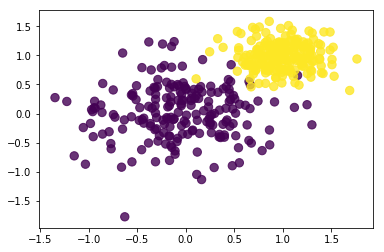

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot